<a href="https://colab.research.google.com/github/ngthvan02/AI/blob/main/Keras1(27032023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from keras import Sequential
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_test.shape)
print(x_train.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


Hinh nay la:  [4]


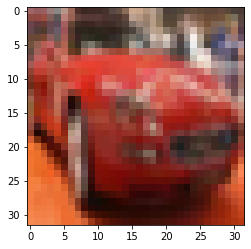

In [40]:
from keras import models
from keras.layers import  Dense
import matplotlib.pyplot as plt
Animal = x_train[5]
plt.imshow(Animal,cmap = plt.cm.binary)
plt.show
print("Hinh nay la: ", y_train[10])

Hinh nay la:  [4]


<ipython-input-41-758be0fc059c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


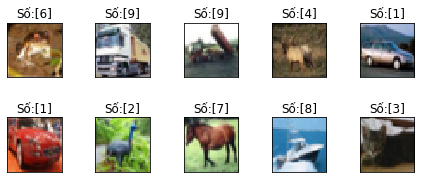

In [41]:
Hinh = x_train[1402]
plt.imshow(Hinh,cmap = plt.cm.binary)
plt.show
print("Hinh nay la: ", y_train[10])
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [42]:
model=models.Sequential()
model.add(Dense(512, input_shape=(32*32*3,), activation = 'relu',name='lop1'))
model.add(Dense(10, activation = 'softmax',name='lop2'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lop1 (Dense)                (None, 512)               1573376   
                                                                 
 lop2 (Dense)                (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [43]:
x_train = x_train.reshape((50000, 32*32*3)) #chỉnh lại kích thước của dữ liệu đầu vào
x_train = x_train.astype('float32')/255 #astype qua float để thực hiện phép chia

In [44]:
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [45]:
from keras.utils import to_categorical #chuyển thành one hot encoding
train_labels = to_categorical(y_train,10)#chuyển thành 10 bit one hot encoding
test_labels =to_categorical(y_test,10)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [46]:
print(x_train.shape)
print(x_train.shape)

(50000, 3072)
(50000, 3072)


In [47]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, test_labels)
print('test_accuracy: ', test_acc)
print('test_loss: ', test_loss)

Epoch 1/10
391/391 [==============================] - 13s 32ms/step - loss: 2.2419 - accuracy: 0.2636
Epoch 2/10
391/391 [==============================] - 14s 35ms/step - loss: 1.7863 - accuracy: 0.3616
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 1.7010 - accuracy: 0.3958
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 1.6488 - accuracy: 0.4151
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 1.6104 - accuracy: 0.4286
Epoch 6/10
391/391 [==============================] - 12s 32ms/step - loss: 1.5796 - accuracy: 0.4414
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5579 - accuracy: 0.4479
Epoch 8/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5306 - accuracy: 0.4582
Epoch 9/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5163 - accuracy: 0.4652
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 1.7469 